importing Jupyter notebook from boston_data_preprocessing.ipynb
Boston 데이터 크기:  (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


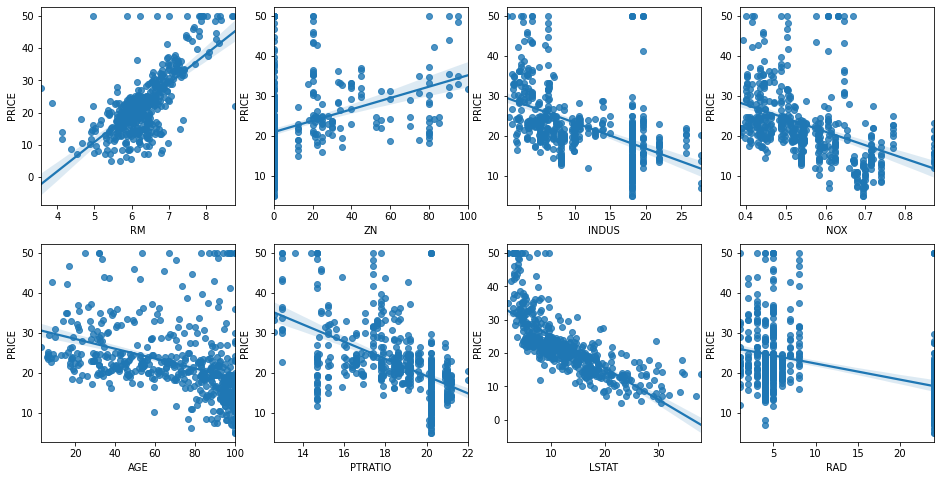

In [1]:
import import_ipynb
from boston_data_preprocessing import get_boston_dataset

X_train,X_test,y_train,y_test = get_boston_dataset()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [8]:
print("절편 값 : ",lr.intercept_)
print("회귀 계수값 :",np.round(lr.coef_,1))

절편 값 :  40.995595172164336
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


#### 각 피처별 회귀 계수값으로 매핑한다.

In [11]:
import pandas as pd

coeff = pd.Series(data=np.round(lr.coef_,1), index=X_train.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

#### 5개의 폴드 세트로 교차검증을 실행한다.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)
bostonDF["PRICE"] = boston.target
y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"],axis=1, inplace=False)

lr= LinearRegression()

neg_mse_scores = cross_val_score(lr,X_data, y_target,scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1* neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 folds 의 개별 RMSE scores: ',np.round(rmse_scores,2))
print(' 5 folds 의 평균 RMSE: ',np.round(avg_rmse,2))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE:  5.83
